In [4]:
def checkValid(string):
    stack = []
    for k in string:       
        if k == '(':
            stack.append(k)
        else:
            if stack:
                stack.pop()
            else:
                return False
    if stack:
        return False
    return True


def longestValidParentheses(s: str) -> int:

    stack = []
    max_len = 0

    for i in range(len(s)):
        for j in range(i+1, len(s)+1):
            substring = s[i:j]
            if checkValid(substring) and len(substring) > max_len:
                max_len = max(max_len, len(substring))
    return max_len


In [41]:
def longestValidParentheses2(string):
    stack = []
    string = list(string)
    max_len = 0
    for i, k in enumerate(string):  
        if k == '(':
            stack.append(i)
        else:
            if stack:
                t = stack.pop()
                string[i]  = '|'
                string[t] = '|'
        print(string, stack)
    
    max_len = 0
    counter = 0
    for i in range(len(string)):
        if string[i] == '|':
            counter += 1
        else:
            max_len = max(max_len, counter)
            counter = 0
    max_len = max(max_len, counter)
    return max_len
                
        

parentheses ="(())))"
print(longestValidParentheses2(parentheses))

['(', '(', ')', ')', ')', ')'] [0]
['(', '(', ')', ')', ')', ')'] [0, 1]
['(', '|', '|', ')', ')', ')'] [0]
['|', '|', '|', '|', ')', ')'] []
['|', '|', '|', '|', ')', ')'] []
['|', '|', '|', '|', ')', ')'] []
4


In [26]:
a = ('(',1)
print(a[1])

1


In [46]:
import collections
def checkValid(string, words, n):
    print(string+'------')
    for i in range(0, len(string)-n+1, n):
        sub = string[i:i+n]
        if sub not in words:
            return False
        else:
            if words[sub] == 1:
                del words[sub]
            else:
                words[sub] -= 1
    if words:
        return False
    return True

def findSubstring(s, words):
    if not s or not words:
        return []
    n, m, output = len(words[0]), len(words), []
    words = collections.Counter(words)

    for i in range(0, len(s)-(n*m)+1):
        sub_string = s[i:i+(n*m)]
        print(i, sub_string)
        if sub_string[0:n] not in words:
            continue
        if checkValid(sub_string, words.copy(), n):  
            output.append(i)
    return output

s = "barfoothefoobarman"
words = ["foo","bar"]
findSubstring(s, words)

0 barfoo
barfoo------
1 arfoot
2 rfooth
3 foothe
foothe------
4 oothef
5 othefo
6 thefoo
7 hefoob
8 efooba
9 foobar
foobar------
10 oobarm
11 obarma
12 barman
barman------


[0, 9]

In [123]:
class Solution:
    def findWords(self, wordSet, string):
        string = ''.join(string)
        output = []
        for word in wordSet:
            flag = True
            for i, j in zip(string, word):
                if i == '*':
                    continue
                elif i != j:
                    flag = False
            if flag:
                output.append(word)
        return output

    def getNeighbours(self, word, wordSet):
        wordList = list(word)
        words = []
        output = set()
        for i in range(len(wordList)):
            temp = wordList[i]
            wordList[i] = '*'
            words.append(''.join(wordList.copy()))
            wordList[i] = temp

        for w in words:
            wordCombination = self.findWords(wordSet, w)
            output.update(wordCombination)
        return list(output)
    
    def ladderLength(self, beginWord: str, endWord: str, wordList) -> int:
        wordSet = set(wordList)
        queue = [beginWord]
        level =  [1]
        visited = set()
        while queue:
            last = queue.pop(0)
            current_level = level.pop(0)
            visited.add(last)  
            neighbours = self.getNeighbours(last, wordSet)

            if last == endWord:
                return current_level

            for neighbour in neighbours:
                if neighbour not in visited:
                    queue.append(neighbour)
                    level.append(current_level + 1)
        return 0
        
        
        
beginWord = "hit"
endWord = "cog"
wordList = ["hot","dot","dog","lot","log","cog"]
solution = Solution()
solution.ladderLength(beginWord, endWord, wordList)

5

### Longest Common Subsequence

`Recursive`

In [13]:
def longest_common_subsequence(a, b): 
    def lcs_helper(a, b, i, j):
        if a[i] == '*' or b[j] == '*':
            return 0
        elif a[i] == b[j]:
            return 1 + lcs_helper(a, b, i+1, j+1)
        else:
            return max(lcs_helper(a, b, i+1, j), lcs_helper(a, b, i, j+1))
    return lcs_helper(a, b, 0, 0)
        
a = "ylqpejqbalahwr"
b = "yrkzavgdmdgtqpg"
longest_common_subsequence(a+'*', b+'*')

3

`Dynamic Progamming`

In [45]:
def pprint(mat):
    for i in mat:
        print(i)
    print()
def longest_common_subsequence_dp(a, b): 
    dp = [[1 for _ in range(len(b)+1)] for _ in range(len(a)+1)]
    pprint(dp)
    
    for i in range(len(a)+1):
        for j in range(len(b)+1):
            if i == 0 or j == 0:
                dp[i][j] = 0
            
            elif a[i-1] == b[j-1]:
                dp[i][j] = 1 + dp[i-1][j-1]
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    pprint(dp)
    return dp[-1][-1]
        
        
a = "longest"
b = "stone"
longest_common_subsequence_dp(a, b)

[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1]

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 2, 2]
[0, 0, 0, 1, 2, 2]
[0, 0, 0, 1, 2, 3]
[0, 1, 1, 1, 2, 3]
[0, 1, 2, 2, 2, 3]



3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


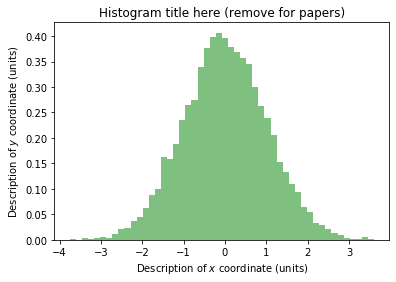

In [50]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.randn(10000)  # example data, random normal distribution
num_bins = 50
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor="green", alpha=0.5)
plt.xlabel(r"Description of $x$ coordinate (units)")
plt.ylabel(r"Description of $y$ coordinate (units)")
plt.title(r"Histogram title here (remove for papers)")
plt.show();

<table>
  <tr>
    <th>Header 1</th>
    <th>Header 2</th>
  </tr>
  <tr>
    <td>row 1, cell 1</td>
    <td>row 1, cell 2</td>
  </tr>
  <tr>
    <td>row 2, cell 1</td>
    <td>row 2, cell 2</td>
  </tr>
</table>

In [84]:
def findNoneRepeating(string):
    counter = [0]*128
    for i in string:
        counter[ord(i)] += 1
    print(counter)
    for i in string:
        if counter[ord(i)] == 1:
            return i
            break
def PalindromicSubstring(string):
    l, r = 0, len(string)-1
    
    
string = 'hellosannasmith' #sannas
findNoneRepeating(string)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


'Z'

In [33]:
def binarySearch(arr, target):
    l, r = 0, len(arr)-1
    while l <= r: 
        mid = (l+r)//2
        if arr[mid] == target:
            print("GOT it", mid)
            return True
        else:
            if arr[mid] < target:
                l = mid + 1
            else:
                r = mid - 1
    return False

def searchIn2D(matrix, target):
    
    for row in matrix:
        if row[0] <= target <= row[-1]:
            if binarySearch(row, target):
                return True
    return False
                
matrix1 = [[1, 4, 7, 11, 15],
           [2, 5, 8, 12, 19],
           [3, 6, 9, 16, 22],
           [10, 13, 14, 17, 24],
           [18, 21, 23, 26, 30]]
target = 20
searchIn2D(matrix1, target)

False

### `minimum substring with all character`

In [86]:
def minSubstringWithAllChars(s, t):
    l, r = 0, 0
    t_set = set(t)
    visited = 0
    min_string = ''*len(s)
    
    while r < len(s):
        if s[r] in t_set:
            visited += 1
            t_set.remove(s[r])
            
        if visited == len(t):
            t_set =set(t)
            min_string = s[l:r+1]
            visited = 0
            l += 1
            r = l
            continue
        r += 1
    return min_string
minSubstringWithAllChars("adobecodebanc", "abc")

'banc'

In [163]:
from collections import defaultdict
def pprint(mat):
    for row in mat:
        print(row)
    print()
    
def get_tokens(requests):
    punctuations = {'.', ',', '!', '?'}
    out = []
    for request in requests:
        filtered_request = ''
        for i in request.lower():
            if i not in punctuations:
                filtered_request += i
        out.append(set(filtered_request.split()))
    return out
        
def jaccard_index(a:set, b:set)->float:
    return round(len(a.intersection(b))/len(a.union(b)), 2)

def spamClusterization(requests, ids, threshold):
    tokens = get_tokens(requests)
    pprint(tokens)
    out = []
    jaccards = [[0 for _ in range(len(requests))] for _ in range(len(requests))]
    
    for i in range(len(jaccards)):
        for j in range(len(jaccards)):
            if i != j:   
                jaccards[i][j] = jaccard_index(tokens[i], tokens[j])
#     pprint(jaccards)
    print(ids)
    
    clusters = defaultdict(set)
    cluster = 0
    for i in range(len(jaccards)):
        for j in range(len(jaccards)):
            if jaccards[i][j] >= threshold:
            
                if clusters:
                    for clst in clusters.copy():
                        if i in clusters[clst] or j in clusters[clst]:
                            clusters[clst].update([i, j])
                        else:
                            clusters[cluster+1] = set([i, j])
                else:
                    clusters[cluster] = set([i, j])
                        
                    print(ids[i], ids[j], clusters)
    print(clusters)
    for cluster in clusters:
        if len(clusters[cluster]) > 1:
            out.append(sorted([ids[num] for num in clusters[cluster]]))
    return out
    
        
                
    
        
    

requests = ["I need a new window", 
            "I really, really want to replace my window", 
            "Replace mY !!.windoW........", 
            "I want a new window?", 
            "I want a new carpet, i want a new carpet, I WANT A NEW CARPET", 
            "RePlAcE!!! !!!My!!! !!!CaRpEt!!!!"]
ids = [374, 2845, 83, 1848, 1837, 1500]
threshold = 0.5
spamClusterization(requests, ids, threshold) # []

{'new', 'need', 'window', 'i', 'a'}
{'really', 'replace', 'window', 'to', 'my', 'want', 'i'}
{'my', 'window', 'replace'}
{'new', 'window', 'a', 'want', 'i'}
{'new', 'carpet', 'a', 'want', 'i'}
{'my', 'carpet', 'replace'}

[374, 2845, 83, 1848, 1837, 1500]
374 1848 defaultdict(<class 'set'>, {0: {0, 3}})
defaultdict(<class 'set'>, {0: {0, 3, 4}, 1: {2, 5}})


[[374, 1837, 1848], [83, 1500]]

In [ ]:
def get_index(self, S: str, i: int):
    count = 1
    while i>=0:
        if S[i] == "#":
            count+=1
        else:
            count-=1
        if count == 0:
            break
        i -=1
    return i
def backspaceCompare(self, S: str, T: str) -> bool:
    i = len(S) - 1
    j = len(T) - 1

    while i>=0 or j>=0:
        i = self.get_index(S,i)
        j = self.get_index(T,j)

        print(i,j)
        if i < 0 and j < 0:
            return True
        elif i < 0 or j < 0:
            return False
        elif S[i] != T[j]:
            return False
        i -=1
        j -=1

    return True

In [207]:
import itertools
def F(S):
    skip = 0
    for x in reversed(S):
        if x == '#':
            skip += 1
        elif skip:
            skip -= 1
        else:
            yield x

def backspaceCompare(S, T):
    
    
    for x, y in zip(F(S), F(T)):
        print(x, y)
#     return all(x == y for x, y in itertools.zip_longest(F(S), F(T)))
        
        
# S = "a#c"
# T = "b"
S = "bxj##tw"
T = "bxj###tw"
print([i for i in F(S)])
print([i for i in F(T)])
backspaceCompare(S, T)
    
    

['w', 't', 'b']
['w', 't']
w w
t t


In [224]:
import numpy as np

def F(num=np.random.randint(100)):
    return num

def F2(num=None):
    
    if num == None:
        num = np.random.randint(100)
        return num
print([F() for _ in range(10)])
print([F2() for _ in range(10)])

[92, 92, 92, 92, 92, 92, 92, 92, 92, 92]
[39, 89, 93, 47, 72, 72, 14, 10, 8, 0]
